In [ ]:
pip install kaggle

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-mri-images-for-brain-tumor-detection


Found 506 files belonging to 3 classes.
Using 405 files for training.
Found 506 files belonging to 3 classes.
Using 101 files for validation.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.2233 - loss: 0.5973 - val_accuracy: 0.2079 - val_loss: 0.4329
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1745 - loss: 0.5515 - val_accuracy: 0.2178 - val_loss: 0.4213
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1861 - loss: 0.5263 - val_accuracy: 0.2178 - val_loss: 0.4242
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1946 - loss: 0.3848 - val_accuracy: 0.2178 - val_loss: 0.4348
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.2060 - loss: 0.6198 - val_accuracy: 0.2079 - val_loss: 0.4471
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.1752 - loss: 0.3533 - val_accuracy: 0.2079 - val_loss: 0.4457
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - a

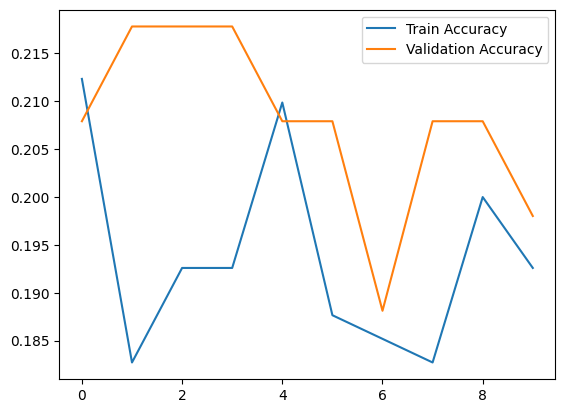

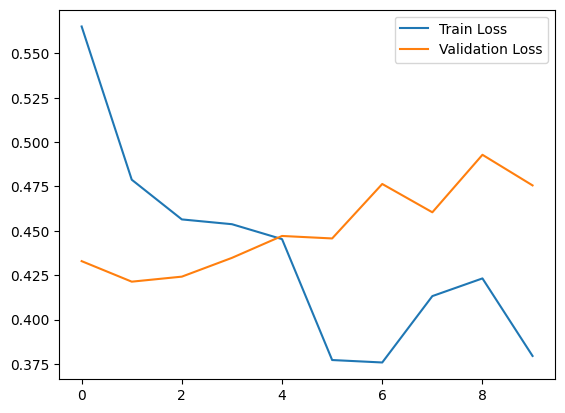

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Dataset path
dataset_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"

# Load the dataset with a validation split
image_size = (224, 224)
batch_size = 32

train_ds = keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

# Data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
])

# Prefetch for performance
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y)).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Create transfer learning model with MobileNetV2 backbone
base_model = keras.applications.MobileNetV2(
    input_shape=image_size + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False

inputs = keras.Input(shape=image_size + (3,))
x = keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)

# Assuming binary classification: tumor or no tumor
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

# Train the model
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# Plot accuracy and loss curves
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()


Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Classes: ['no', 'yes']
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5291 - loss: 0.9281 - val_accuracy: 0.6400 - val_loss: 0.8397
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6850 - loss: 0.6439 - val_accuracy: 0.6800 - val_loss: 0.5753
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7474 - loss: 0.5426 - val_accuracy: 0.7000 - val_loss: 0.5200
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7534 - loss: 0.5420 - val_accuracy: 0.7200 - val_loss: 0.5324
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7830 - loss: 0.4590 - val_accuracy: 0.8200 - val_loss: 0.4520
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7897 - loss: 0.4237 - val_accuracy: 0.8000 - val_loss: 0.4238
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8374 - loss: 0.4419 - val_accu

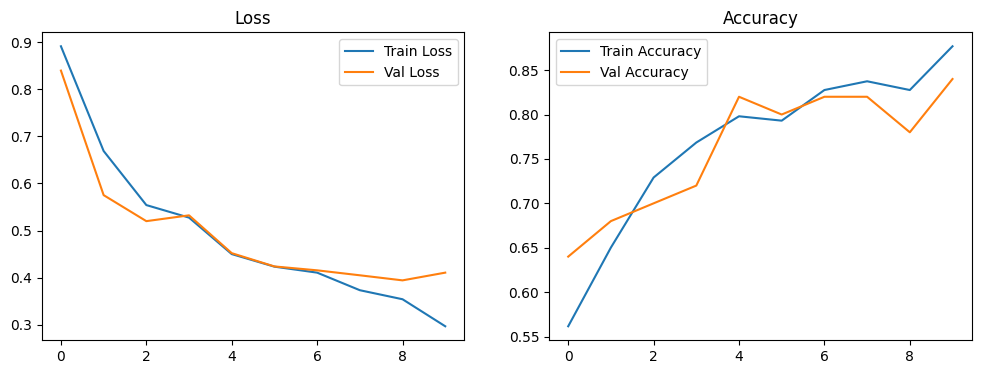

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
DATA_DIR = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Get class names
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Transfer Learning Model with MobileNetV2
def build_model(input_shape=(224, 224, 3), num_classes=3):
    base_model = keras.applications.MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = keras.applications.mobilenet_v2.preprocess_input(x)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    return model

# Compile model
model = build_model(input_shape=IMAGE_SIZE + (3,), num_classes=num_classes)
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# Plotting results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()


data loading

In [ ]:
image_size = (224, 224)
batch_size = 16

train_ds = keras.utils.image_dataset_from_directory(
    "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = keras.utils.image_dataset_from_directory(
    "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Classes: ['no', 'yes']


prefetch and argument

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

model and fine tuning

In [ ]:
base_model = keras.applications.MobileNetV2(
    input_shape=image_size + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # First, freeze it

# Wrap in custom model
inputs = keras.Input(shape=image_size + (3,))
x = keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


compile and train

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True),
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks,
)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.4726 - loss: 0.8307 - val_accuracy: 0.5000 - val_loss: 0.6890
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 787ms/step - accuracy: 0.5632 - loss: 0.7041 - val_accuracy: 0.5800 - val_loss: 0.6695
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 712ms/step - accuracy: 0.6491 - loss: 0.6699 - val_accuracy: 0.6600 - val_loss: 0.6594
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 810ms/step - accuracy: 0.6082 - loss: 0.6566 - val_accuracy: 0.6600 - val_loss: 0.6474
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 878ms/step - accuracy: 0.6806 - loss: 0.6302 - val_accuracy: 0.6600 - val_loss: 0.6343
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6891 - loss: 0.6246 - val_accuracy: 0.6600 - val_loss: 0.6221
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 746ms/step - accuracy: 0.6668 - loss: 0.6389 - val_accuracy: 0.6800 - val_loss: 0.6127
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 928ms/step - accuracy: 0.6062 - loss: 0.6719 - val_accuracy: 

fine tuning

In [ ]:
# Unfreeze base model for fine-tuning
base_model.trainable = True

# Compile again with a low learning rate
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

# Fine-tune for a few more epochs
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=callbacks  # EarlyStopping still active
)


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.6491 - loss: 0.7211 - val_accuracy: 0.7200 - val_loss: 0.5569
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.6896 - loss: 0.6102 - val_accuracy: 0.7800 - val_loss: 0.5407
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.7241 - loss: 0.5299 - val_accuracy: 0.7200 - val_loss: 0.5345
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.7885 - loss: 0.4735 - val_accuracy: 0.7400 - val_loss: 0.5368
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.8349 - loss: 0.3948 - val_accuracy: 0.7000 - val_loss: 0.5459


eval performance

In [ ]:
# Evaluate final performance
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_accuracy:.2%}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - accuracy: 0.6963 - loss: 0.5411
Validation Accuracy: 72.00%


inspect predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


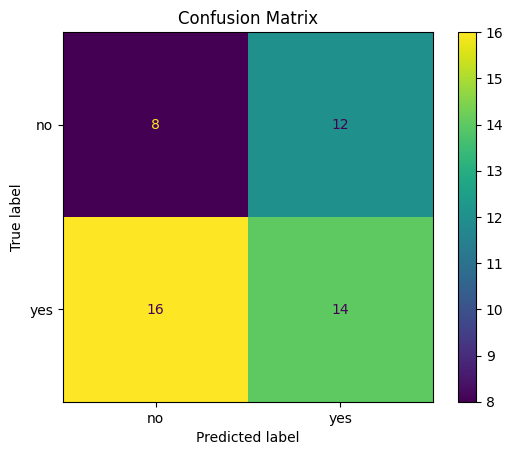

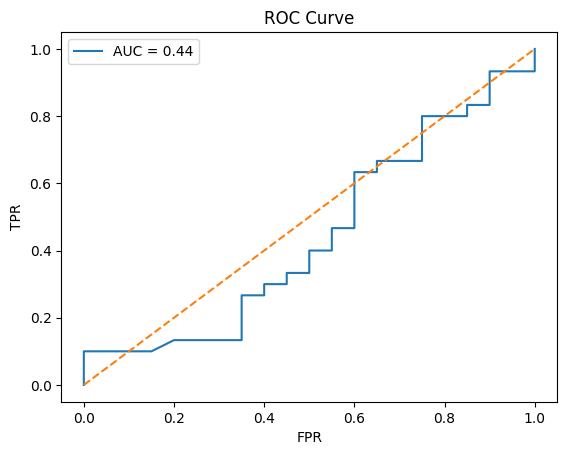

In [ ]:
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_probs = model.predict(val_ds).flatten()
y_pred = (y_probs > 0.5).astype(int)

# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=class_names)
plt.title("Confusion Matrix")
plt.show()

# ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()


visual training curves

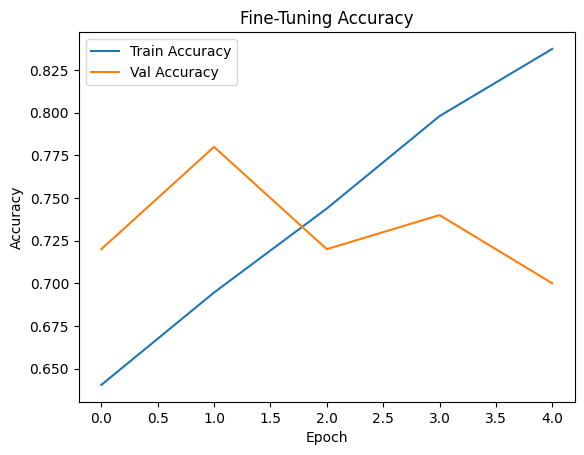

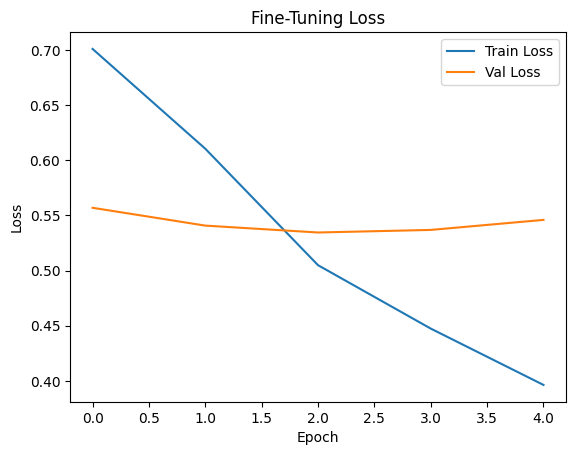

In [ ]:
plt.plot(fine_tune_history.history["accuracy"], label="Train Accuracy")
plt.plot(fine_tune_history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Fine-Tuning Accuracy")
plt.legend()
plt.show()

plt.plot(fine_tune_history.history["loss"], label="Train Loss")
plt.plot(fine_tune_history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Fine-Tuning Loss")
plt.legend()
plt.show()


In [ ]:
# Data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.1),
])

# Prepare dataset
train_ds = train_ds.cache().shuffle(1000).map(lambda x, y: (data_augmentation(x), y)).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Build model
base_model = keras.applications.MobileNetV2(input_shape=image_size + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

inputs = keras.Input(shape=image_size + (3,))
x = keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Callbacks
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=1)
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
callbacks = [lr_scheduler, early_stopping]

# Train
history = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=callbacks)

# Fine-tune
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

fine_tune_history = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=callbacks)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6578 - loss: 0.6865 - val_accuracy: 0.6200 - val_loss: 0.6389 - learning_rate: 1.0000e-04
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 894ms/step - accuracy: 0.5261 - loss: 0.8100 - val_accuracy: 0.6400 - val_loss: 0.5843 - learning_rate: 1.0000e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 896ms/step - accuracy: 0.6194 - loss: 0.6479 - val_accuracy: 0.6400 - val_loss: 0.5588 - learning_rate: 1.0000e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 896ms/step - accuracy: 0.6695 - loss: 0.6065 - val_accuracy: 0.7000 - val_loss: 0.5341 - learning_rate: 1.0000e-04
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 895ms/step - accuracy: 0.6352 - loss: 0.6166 - val_accuracy: 0.7000 - val_loss: 0.5002 - learning_rate: 1.0000e-04
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 900ms/step - accuracy: 0.7475 - loss: 0.5086 - val_accuracy: 0.7000 - val_loss: 0.4895 - learning_rate: 1.0000e-04
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 856ms/step - accura

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

image_size = (224, 224)
base_model = keras.applications.MobileNetV2(
    input_shape=image_size + (3,),
    include_top=False,
    weights="imagenet",
)

base_model.trainable = False  # freeze base model initially

inputs = keras.Input(shape=image_size + (3,))
x = keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)

# Correct: apply GlobalAveragePooling2D only once here
x = layers.GlobalAveragePooling2D()(x)

# Add classifier head
x = layers.Dropout(0.5)(x)
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_5 (TrueDivide)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_5 (Subtract)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,593 (9.24 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 2,258,240 (8.61 MB)